In [795]:
#no of times wala final
import matplotlib.pyplot as plt
import networkx as nx

In [796]:
G=nx.Graph()
init_links=[]

In [797]:
def initiate():
    #converting text to list of edges
    edge_list=[]
    f=open("example.txt","r")
    for line in f:
        spl=line.split()
        spl = [int(i) for i in spl]
        edge_list.append(spl)
    for i in range(len(edge_list)):
        if edge_list[i][0]>900 and edge_list[i][0]<950 and edge_list[i][1]>900 and edge_list[i][1]<950:
            G.add_edge(edge_list[i][0],edge_list[i][1])
    G.add_edge(901,931)
    G.add_edge(939,907)
    G.add_edge(939,924)
    G.add_edge(939,907)
    G.add_edge(920,914)
    G.add_edge(939,907)
    G.add_edge(922,907)
    G.add_edge(922,919)
    G.add_edge(940,945)
    G.add_edge(940,945)
    G.add_edge(912,901)

In [798]:
initiate()

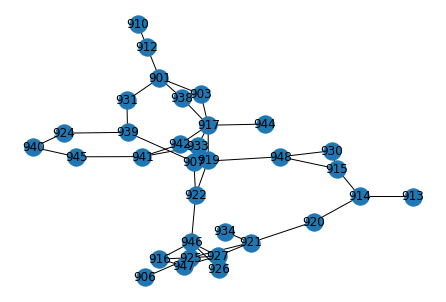

In [799]:
nx.draw(G,with_labels=True)
plt.show()

In [800]:
betCent=nx.betweenness_centrality(G,normalized=True,endpoints=True)
sorted(betCent, key=betCent.get, reverse=True)[:5]

[922, 946, 907, 919, 917]

In [801]:
eigenCent=nx.eigenvector_centrality(G,max_iter=1000)
sorted(eigenCent,key=eigenCent.get,reverse=True)[:5]

[946, 925, 927, 916, 947]

In [802]:
degCent=nx.degree_centrality(G)
sorted(degCent,key=degCent.get,reverse=True)[:5]

[917, 946, 925, 901, 942]

In [803]:
x=0
link_pred={}
link_adamic_adar=[]
preds=nx.jaccard_coefficient(G)
#print(preds)
for u,v,p in preds:
    sp=(min(u,v),max(u,v))
    link_pred[sp]=p
    if p>0:
        x+=1
print(x)
s=sorted(link_pred,key=link_pred.get,reverse=True)
for i in range(len(link_pred)):
    if(link_pred[s[i]]>0):
        link_adamic_adar.append(list(s[i]))
def sortFirst(val):
    return val[0]
link_adamic_adar.sort(key=sortFirst)
set1=set(tuple(i) for i in link_adamic_adar)

70


In [804]:
link_pred_adam={}
for i in range(len(link_pred)):
    link_pred_adam[s[i]]=link_pred[s[i]]
link_pred_adam

{(903, 938): 1.0,
 (916, 927): 0.75,
 (925, 947): 0.6,
 (903, 944): 0.5,
 (913, 920): 0.5,
 (919, 933): 0.5,
 (920, 934): 0.5,
 (938, 944): 0.5,
 (903, 912): 0.3333333333333333,
 (903, 931): 0.3333333333333333,
 (906, 916): 0.3333333333333333,
 (912, 931): 0.3333333333333333,
 (912, 938): 0.3333333333333333,
 (913, 915): 0.3333333333333333,
 (916, 926): 0.3333333333333333,
 (919, 944): 0.3333333333333333,
 (922, 926): 0.3333333333333333,
 (924, 931): 0.3333333333333333,
 (924, 945): 0.3333333333333333,
 (926, 947): 0.3333333333333333,
 (931, 938): 0.3333333333333333,
 (933, 944): 0.3333333333333333,
 (917, 941): 0.2857142857142857,
 (901, 910): 0.25,
 (901, 917): 0.25,
 (903, 919): 0.25,
 (903, 933): 0.25,
 (906, 921): 0.25,
 (906, 927): 0.25,
 (907, 924): 0.25,
 (907, 930): 0.25,
 (907, 931): 0.25,
 (914, 930): 0.25,
 (915, 920): 0.25,
 (919, 938): 0.25,
 (921, 946): 0.25,
 (926, 927): 0.25,
 (927, 934): 0.25,
 (933, 938): 0.25,
 (933, 945): 0.25,
 (939, 940): 0.25,
 (940, 941): 0.25,

In [805]:
G.edges(data=True)

EdgeDataView([(901, 903, {}), (901, 938, {}), (901, 931, {}), (901, 912, {}), (903, 917, {}), (938, 917, {}), (917, 919, {}), (917, 933, {}), (917, 942, {}), (917, 944, {}), (906, 925, {}), (925, 916, {}), (925, 921, {}), (925, 927, {}), (925, 946, {}), (907, 948, {}), (907, 939, {}), (907, 922, {}), (948, 915, {}), (948, 930, {}), (910, 912, {}), (913, 914, {}), (914, 915, {}), (914, 920, {}), (915, 930, {}), (916, 946, {}), (916, 947, {}), (946, 922, {}), (946, 926, {}), (946, 927, {}), (946, 947, {}), (947, 927, {}), (919, 942, {}), (919, 922, {}), (933, 941, {}), (933, 942, {}), (942, 941, {}), (920, 921, {}), (921, 927, {}), (921, 934, {}), (924, 940, {}), (924, 939, {}), (940, 945, {}), (931, 939, {}), (941, 945, {})])

In [806]:
def addEdgeWeight(x,y):
    weight=1
    for i in nx.common_neighbors(G,x,y):
        weight+=1/G.degree(i)
    return weight

In [807]:
#for updating and assigning weight to the network#
def weightAssign():
    for i in G.edges():
        attrs={(i[0],i[1]):{'weight':addEdgeWeight(i[0],i[1])}}
        nx.set_edge_attributes(G,attrs)
weightAssign()

In [808]:
G.edges(data=True)

EdgeDataView([(901, 903, {'weight': 1}), (901, 938, {'weight': 1}), (901, 931, {'weight': 1}), (901, 912, {'weight': 1}), (903, 917, {'weight': 1}), (938, 917, {'weight': 1}), (917, 919, {'weight': 1.25}), (917, 933, {'weight': 1.25}), (917, 942, {'weight': 1.6666666666666665}), (917, 944, {'weight': 1}), (906, 925, {'weight': 1}), (925, 916, {'weight': 1.1666666666666667}), (925, 921, {'weight': 1.25}), (925, 927, {'weight': 1.4166666666666667}), (925, 946, {'weight': 1.5833333333333333}), (907, 948, {'weight': 1}), (907, 939, {'weight': 1}), (907, 922, {'weight': 1}), (948, 915, {'weight': 1.5}), (948, 930, {'weight': 1.3333333333333333}), (910, 912, {'weight': 1}), (913, 914, {'weight': 1}), (914, 915, {'weight': 1}), (914, 920, {'weight': 1}), (915, 930, {'weight': 1.3333333333333333}), (916, 946, {'weight': 1.5333333333333332}), (916, 947, {'weight': 1.1666666666666667}), (946, 922, {'weight': 1}), (946, 926, {'weight': 1}), (946, 927, {'weight': 1.5333333333333332}), (946, 947, {

In [809]:
#this list is used to conquere recursion
init_nodes=[]

In [810]:
#spread is working,let's work around
def spread(node_id,info_id):
    for i in list(G.neighbors(node_id)):
        info=G.edges[i,node_id]['weight']#weight bhejenge
        if(i!=info_id):
            info_receive(node_id,i,info_id,info)
            if i not in init_nodes:
                init_nodes.append(i)
    while(len(init_nodes)!=0):
        receiver_id=init_nodes.pop()
        info=G.nodes[receiver_id][info_id][0]
        total_weight_sum=0
        for i in G.neighbors(receiver_id):
            total_weight_sum+=G.edges[i,receiver_id]['weight']
        if((info/total_weight_sum)>=0.28 and total_weight_sum!=0 and G.nodes[receiver_id][info_id][1]==False):
            G.nodes[receiver_id][info_id][1]=True
            spread(receiver_id,info_id)

In [811]:
#working and checked
#threshold to be set
def info_receive(sender_id,receiver_id,info_id,info):
    if(info_id not in G.nodes[receiver_id].keys()): #check if info_id pre-exist
        #first list to store info_id,info,state
        list_info=[info,False,1]
        attr={receiver_id:{info_id:list_info}}
        nx.set_node_attributes(G,attr)
        total_weight_sum=0
        if(G.has_edge(info_id,receiver_id)==False and G.nodes[receiver_id][info_id][2]>=2 and [min(info_id,receiver_id),max(info_id,receiver_id)] not in init_links):
            #G.add_edge(info_id,receiver_id)
            #weightAssign()
            init_links.append([min(info_id,receiver_id),max(info_id,receiver_id)])
    else:
        info=G.nodes[receiver_id][info_id][0]+G.edges[sender_id,receiver_id]['weight'] #has to be replaced with 
        no_of_times=G.nodes[receiver_id][info_id][2]+1
        list_info=[info,G.nodes[receiver_id][info_id][1],no_of_times]
        attr={receiver_id:{info_id:list_info}}
        nx.set_node_attributes(G,attr)
        total_weight_sum=0
        if(G.has_edge(info_id,receiver_id)==False and G.nodes[receiver_id][info_id][2]>=2 and [min(info_id,receiver_id),max(info_id,receiver_id)] not in init_links):
            #G.add_edge(info_id,receiver_id)
            #weightAssign()
            init_links.append([min(info_id,receiver_id),max(info_id,receiver_id)])

In [812]:
#sare kaam yha honge
for i in G.nodes:
    spread(i,i)

In [813]:
init_links

[[901, 939],
 [901, 924],
 [901, 940],
 [901, 907],
 [901, 922],
 [901, 917],
 [901, 919],
 [901, 942],
 [901, 933],
 [901, 941],
 [901, 945],
 [917, 941],
 [917, 945],
 [917, 940],
 [917, 924],
 [917, 939],
 [907, 917],
 [917, 931],
 [912, 917],
 [917, 922],
 [925, 947],
 [922, 925],
 [907, 925],
 [925, 939],
 [924, 925],
 [925, 940],
 [920, 925],
 [914, 925],
 [907, 924],
 [907, 940],
 [914, 948],
 [922, 948],
 [939, 948],
 [924, 948],
 [940, 948],
 [907, 915],
 [915, 922],
 [915, 939],
 [915, 924],
 [915, 940],
 [907, 930],
 [922, 930],
 [930, 939],
 [924, 930],
 [930, 940],
 [914, 930],
 [916, 927],
 [916, 922],
 [907, 916],
 [916, 939],
 [916, 924],
 [916, 940],
 [916, 921],
 [916, 920],
 [914, 916],
 [921, 946],
 [920, 946],
 [914, 946],
 [907, 946],
 [939, 946],
 [924, 946],
 [940, 946],
 [922, 947],
 [907, 947],
 [939, 947],
 [924, 947],
 [940, 947],
 [921, 947],
 [920, 947],
 [914, 947],
 [907, 919],
 [919, 939],
 [919, 924],
 [919, 940],
 [933, 945],
 [933, 940],
 [924, 933],

In [1]:
set2=set(tuple(i) for i in init_links)

NameError: name 'init_links' is not defined

In [815]:
len(set1.intersection(set2))

40

In [816]:
len(set1.union(set2))

155